# Micromorphic Matrix Form Derivation

We here derive the matrix form of the micromorphic balance equations.

In [1]:
import sympy
import numpy as np

from sympy.utilities.codegen import codegen

sympy.init_printing()

In [2]:
def form_tensor(symbol,shape,isreal=True,isfunction=False,add_open_brace=False,add_close_brace=False,add_braces=False,variables=[]):
    
    if(add_braces):
        add_open_brace = True
        add_close_brace = True
    
    if(add_open_brace):
        symbol += r"{"
    
    if(len(shape)>1):
        return [form_tensor(symbol+str(i+1),shape[1:],\
                            isreal=isreal,isfunction=isfunction,\
                            add_close_brace=add_close_brace,variables=variables)\
                for i in range(shape[0])]
    else:
        
        if add_close_brace:
            cb = r"}"
        else:
            cb = ""
        
        if(isfunction):
            return [sympy.Function(symbol+str(i+1)+cb,real=isreal)(*variables) for i in range(shape[0])]
        else:
            return [sympy.symbols(symbol+str(i+1)+cb,real=isreal) for i in range(shape[0])]
    
def make_symmetric_2(tensor):
    """Make a second order tensor symmetric"""
    for i in range(3):
        for j in range(3):
            tensor[j][i] = tensor[i][j]
            
def make_symmetric_4(tensor,major_symm=False,minor_symm=False):
    """Make a fourth order tensor symmetric"""
    
    if(major_symm):
        for i in range(3):
            for j in range(3):
                for k in range(3):
                    for l in range(3):
                        tensor[k][l][i][j] = tensor[i][j][k][l]
                        
    if(minor_symm):
        for i in range(3):
            for j in range(3):
                for k in range(3):
                    for l in range(3):
                        tensor[j][i][k][l] = tensor[i][j][k][l]
                        tensor[i][j][l][k] = tensor[i][j][k][l]

def tensor_to_voigt_2(A,issymm=False):
    
    if issymm: n = 6
    else:      n = 9
    
    a = [None for _ in range(n)]
    
    a[0] = A[0][0]
    a[1] = A[1][1]
    a[2] = A[2][2]
    a[3] = A[1][2]
    a[4] = A[0][2]
    a[5] = A[0][1]
    
    if not issymm:
        a[6] = A[2][1]
        a[7] = A[2][0]
        a[8] = A[1][0]
        
    return a

def tensor_to_voigt_3(A,asmatrix=False):
    
    if not asmatrix:
        a = [None for _ in range(27)]
    else:
        a = [[None for _ in range(9)] for __ in range(3)]
    
    for i in range(3):
        
        b = tensor_to_voigt_2(A[i])
        
        if not asmatrix:
            a[0+9*i] = b[0]
            a[1+9*i] = b[1]
            a[2+9*i] = b[2]
            a[3+9*i] = b[3]
            a[4+9*i] = b[4]
            a[5+9*i] = b[5]
            a[6+9*i] = b[6]
            a[7+9*i] = b[7]
            a[8+9*i] = b[8]
        else:
            a[i][0] = b[0]
            a[i][1] = b[1]
            a[i][2] = b[2]
            a[i][3] = b[3]
            a[i][4] = b[4]
            a[i][5] = b[5]
            a[i][6] = b[6]
            a[i][7] = b[7]
            a[i][8] = b[8]
        
    return a

def voigt_to_tensor_2(a):
    
    A = [[None for _ in range(3)] for __ in range(3)]
    
    A[0][0] = a[0]
    A[1][1] = a[1]
    A[2][2] = a[2]
    A[1][2] = a[3]
    A[0][2] = a[4]
    A[0][1] = a[5]
    
    if(len(a)==6):
        A[2][1] = a[3]
        A[2][0] = a[4]
        A[1][0] = a[5]
        
    elif(len(a)==9):
        A[2][1] = a[6]
        A[2][0] = a[7]
        A[1][0] = a[8]
        
    else:
        print("Error: incoming vector of incorrect size.\n"+\
              "       Vector is of length: {0}\n".format(len(a))+\
              "       Must be of length 6 or 9.")
        raise IOError
    return A
        
def get_symm_2(A):
    
    half = sympy.S(1)/sympy.S(2)
    
    if(len(A)!=len(A[0])):
        print("Error: Matrix must be square.")
        raise IOError
        
    for i in range(len(A)):
        if(len(A[0])!=len(A[i])):
            print("Error: Matrix columns are inconsistent in length")
            raise IOError
    
    Asymm = form_tensor("A_symm",[len(A),len(A[0])])
    
    for i in range(3):
        for j in range(3):
            Asymm[i][j] = half*(A[i][j]+A[j][i])
            
    return Asymm
            
def get_skew_2(A):
    
    half = sympy.S(1)/sympy.S(2)
    
    if(len(A)!=len(A[0])):
        print("Error: Matrix must be square.")
        raise IOError
        
    for i in range(len(A)):
        if(len(A[0])!=len(A[i])):
            print("Error: Matrix columns are inconsistent in length")
            raise IOError
    
    Askew = form_tensor("A_skew",[len(A),len(A[0])])
    
    for i in range(3):
        for j in range(3):
            Askew = half*(A[i][j]-A[j][i])
            
    return Askew

def pseudo_inverse(A,isright=True):
    
    M = sympy.Matrix(A)
    
    if(isright):
        return M.H * (M * M.H) ** -1
    else:
        return (M.H * M) ** -1 * M.H

In [3]:
"Test the form_tensor function"
A = form_tensor(r'A_',[3,3],add_braces=True)
print(A)
make_symmetric_2(A)
print(A)
B = form_tensor('B',[3,3,3])
print(B)
C = form_tensor('C',[3,3,3,3])
print(C)
make_symmetric_4(C,major_symm=True)
print(C)
print(C[1][2][2][1])
print(C[2][1][1][2])

[[A_{11}, A_{12}, A_{13}], [A_{21}, A_{22}, A_{23}], [A_{31}, A_{32}, A_{33}]]
[[A_{11}, A_{12}, A_{13}], [A_{12}, A_{22}, A_{23}], [A_{13}, A_{23}, A_{33}]]
[[[B111, B112, B113], [B121, B122, B123], [B131, B132, B133]], [[B211, B212, B213], [B221, B222, B223], [B231, B232, B233]], [[B311, B312, B313], [B321, B322, B323], [B331, B332, B333]]]
[[[[C1111, C1112, C1113], [C1121, C1122, C1123], [C1131, C1132, C1133]], [[C1211, C1212, C1213], [C1221, C1222, C1223], [C1231, C1232, C1233]], [[C1311, C1312, C1313], [C1321, C1322, C1323], [C1331, C1332, C1333]]], [[[C2111, C2112, C2113], [C2121, C2122, C2123], [C2131, C2132, C2133]], [[C2211, C2212, C2213], [C2221, C2222, C2223], [C2231, C2232, C2233]], [[C2311, C2312, C2313], [C2321, C2322, C2323], [C2331, C2332, C2333]]], [[[C3111, C3112, C3113], [C3121, C3122, C3123], [C3131, C3132, C3133]], [[C3211, C3212, C3213], [C3221, C3222, C3223], [C3231, C3232, C3233]], [[C3311, C3312, C3313], [C3321, C3322, C3323], [C3331, C3332, C3333]]]]
[[[[C1111

Generate constant values that we need.

In [4]:
zero  = sympy.S(0)
one   = sympy.S(1)
two   = sympy.S(2)
three = sympy.S(3)

half = one/two

#Form the identity tensor|
eye  = [[zero for _ in range(3)] for __ in range(3)]
eye[0][0] = one
eye[1][1] = one
eye[2][2] = one

Now lets test the symmetry functions by computing the stiffness matrix for a linear elastic material

In [5]:
E = form_tensor('E',[3,3])
lamb,mu = sympy.symbols('lambda mu',real=True,positive=True)
make_symmetric_2(E)

sigma = form_tensor('sigma',[3,3])

for I in range(3):
    for J in range(3):
        sigma[I][J] = lamb*eye[I][J]*(E[0][0]+E[1][1]+E[2][2]) + two*mu*E[I][J]

sympy.Matrix(tensor_to_voigt_2(sigma,issymm=True)).jacobian(tensor_to_voigt_2(E,issymm=True))

⎡λ + 2⋅μ     λ        λ      0    0    0 ⎤
⎢                                        ⎥
⎢   λ     λ + 2⋅μ     λ      0    0    0 ⎥
⎢                                        ⎥
⎢   λ        λ     λ + 2⋅μ   0    0    0 ⎥
⎢                                        ⎥
⎢   0        0        0     2⋅μ   0    0 ⎥
⎢                                        ⎥
⎢   0        0        0      0   2⋅μ   0 ⎥
⎢                                        ⎥
⎣   0        0        0      0    0   2⋅μ⎦

In [6]:
tensor_to_voigt_3(form_tensor('D',[3,3,3]))

Form the terms which exist in our balance equations

In [7]:
u    = sympy.symbols('u_1 u_2 u_3',real=True)                      #Displacements
v    = sympy.symbols('\dot{u}_1 \dot{u}_2 \dot{u}_3',real=True)    #Velocity
a    = sympy.symbols('\ddot{u}_1 \ddot{u}_2 \ddot{u}_3',real=True) #Accelerations
F    = form_tensor('F',[3,3],isfunction=False,variables=[u])       #Deformation Gradient
rho0 = sympy.symbols('rho0',real=True,positive=True)               #Density in the reference configuration
X    = sympy.symbols('X_1 X_2 X_3')

S    = form_tensor('S',[3,3],isfunction=False,variables=[u])        #PK2 stress
make_symmetric_2(S)
N    = sympy.symbols('N^n',real=True)                              #The shape function
dNdX = form_tensor(r'\frac{dN^{n}}{dX}_',[3],add_braces=True)      #The derivative of the shape function w.r.t. X
Jac  = sympy.symbols('J',real=True,positive=True)                  #Jacobian of transformation
Jhat = sympy.symbols(r'\hat{J}',real=True,positive=True)           #Jacobian of transformation to master coordinates
b    = sympy.symbols('b_1 b_2 b_3',real=True)                      #Body force

## Deformation Measures

Define the deformation measures

In [8]:
RCG    = form_tensor(r"C_",      [3,3],   isreal=True,add_braces=True)
RCGinv = form_tensor(r"C^{-1}_", [3,3],   isreal=True,add_braces=True)
Psi    = form_tensor(r"\Psi_",   [3,3],   isreal=True,add_braces=True)
Gamma  = form_tensor(r"\Gamma_", [3,3,3], isreal=True,add_braces=True)


E     = form_tensor(r"E_", [3,3], isreal=True, add_braces=True)
#make_symmetric_2(E)
e     = form_tensor(r"\mathcal{E}_", [3,3],   isreal=True, add_braces=True)

#for I in range(3):
#    for J in range(3):
#        E[I][J] = half*(RCG[I][J] - eye[I][J])
#        e[I][J] = Psi[I][J] - eye[I][J]

## Linear Isotropic Elasticity Stress Measures

Compute the stress measures

In [9]:
lamb,mu,eta,tau,kappa,nu,sigma = sympy.symbols('lambda mu eta tau kappa nu sigma',real=True)
tau1,tau2,tau3,tau4,tau5,tau6,tau7,tau8,tau9,tau10,tau11 = sympy.symbols('tau1 tau2 tau3 tau4 tau5 tau6 tau7 tau8 tau9 tau10 tau11',real=True)

A = form_tensor(r'\mathcal{A}',[3,3,3,3],     isreal=True)
B = form_tensor(r'\mathcal{B}',[3,3,3,3],     isreal=True)
C = form_tensor(r'\mathcal{C}',[3,3,3,3,3,3], isreal=True)
D = form_tensor(r'\mathcal{D}',[3,3,3,3],     isreal=True)

In [10]:
for k in range(3):
    for l in range(3):
        for m in range(3):
            for n in range(3):
                A[k][l][m][n] = lamb*eye[k][l]*eye[m][n] + mu*(eye[k][m]*eye[l][n] + eye[k][n]*eye[l][m])
                B[k][l][m][n] = (eta-tau)*eye[k][l]*eye[m][n] + kappa*eye[k][m]*eye[l][n] + nu*eye[k][n]*eye[l][m]\
                                - sigma*(eye[k][m]*eye[l][n] + eye[k][n]*eye[l][m])
                    
                for p in range(3):
                    for q in range(3):
                        C[k][l][m][n][p][q] =  tau1*(eye[k][l]*eye[m][n]*eye[p][q] + eye[k][q]*eye[l][m]*eye[n][p])\
                                              +tau2*(eye[k][l]*eye[m][p]*eye[n][q] + eye[k][m]*eye[l][q]*eye[n][p])\
                                              +tau3*eye[k][l]*eye[m][q]*eye[n][p]  + tau4*eye[k][n]*eye[l][m]*eye[p][q]\
                                              +tau5*(eye[k][m]*eye[l][n]*eye[p][q] + eye[k][p]*eye[l][m]*eye[n][q])\
                                              +tau6*eye[k][m]*eye[l][p]*eye[n][q]  + tau7*eye[k][n]*eye[l][p]*eye[m][q]\
                                              +tau8*(eye[k][p]*eye[l][q]*eye[m][n] + eye[k][q]*eye[l][n]*eye[m][p])\
                                              +tau9*eye[k][n]*eye[l][q]*eye[m][p]  + tau10*eye[k][p]*eye[l][n]*eye[m][q]\
                                              +tau11*eye[k][q]*eye[l][p]*eye[m][n]
                                            
                D[k][l][m][n] = tau*eye[k][l]*eye[m][n] + sigma*(eye[k][m]*eye[l][n]+eye[k][n]*eye[l][m])

### PK2 Stress tensor

Form a matrix-multiplication form of the PK2 stress tensor

In [11]:
term1  = form_tensor('term1',  [3,3], isreal=True)
term2  = form_tensor('term2',  [3,3], isreal=True)
term3  = form_tensor('term4',  [3,3], isreal=True)
term4  = form_tensor('term4',  [3,3], isreal=True)
term5  = form_tensor('term5',  [3,3], isreal=True)

temp1  = form_tensor('temp1', [3,3],   isreal=True)
temp2  = form_tensor('temp2', [3,3],   isreal=True)
temp3  = form_tensor('temp3', [3,3],   isreal=True)
temp4  = form_tensor('temp4', [3,3,3], isreal=True)
temp5  = form_tensor('temp5', [3,3,3], isreal=True)

T3     = form_tensor(r"T_",           [3,3],   isreal=True, add_braces=True)
T4     = form_tensor(r"\mathcal{T}_", [3,3,3], isreal=True, add_braces=True)

for i in range(3):
    for j in range(3):
        
        term1[i][j]  = zero
        term2[i][j]  = zero
        temp1[i][j] = zero
        temp2[i][j] = zero
        
        for k in range(3):
            for l in range(3):
                term1[i][j] += A[i][j][k][l]*E[k][l]
                term2[i][j] += D[i][j][k][l]*e[k][l]
                temp1[i][j] += B[i][j][k][l]*e[k][l]
                temp2[i][j] += D[i][j][k][l]*E[k][l]
                
for j in range(3):
    for q in range(3):
        
        temp3[j][q] = zero
        
        for t in range(3):
            temp3[j][q] += RCGinv[t][j]*Psi[t][q]

for j in range(3):
    for q in range(3):
        for r in range(3):
            temp4[j][q][r] = zero
            
            for s in range(3):
                temp4[j][q][r] += RCGinv[j][s]*Gamma[s][q][r]
            
for i in range(3):
    for j in range(3):
        
        term3[i][j] = zero
        term4[i][j] = zero
        
        for q in range(3):
            for r in range(3):
                term3[i][j] += temp1[i][q]*T3[j][q]
                term4[i][j] += temp2[i][q]*T3[j][q]
            
for i in range(3):
    for q in range(3):
        for r in range(3):
            temp5[i][q][r] = zero
            
            for l in range(3):
                for m in range(3):
                    for n in range(3):
                        temp5[i][q][r] += C[i][q][r][l][m][n]*Gamma[l][m][n]
                        
for i in range(3):
    for j in range(3):
        term5[i][j] = zero
        
        for q in range(3):
            for r in range(3):
                term5[i][j] += temp5[i][q][r]*T4[j][q][r]
                        
                
            
E_voigt      = tensor_to_voigt_2(E,        issymm=False)
e_voigt      = tensor_to_voigt_2(e,        issymm=False)
temp3_voigt  = tensor_to_voigt_2(temp3,    issymm=False)
T3_voigt     = tensor_to_voigt_2(T3,       issymm=False)
T4_voigt     = tensor_to_voigt_3(T4)
RCGinv_voigt = tensor_to_voigt_2(RCGinv,   issymm=False)
Gamma_voigt  = tensor_to_voigt_3(Gamma)
            
term1_matrix = sympy.Matrix(tensor_to_voigt_2(term1,issymm=False)).jacobian(E_voigt)
term2_matrix = sympy.Matrix(tensor_to_voigt_2(term2,issymm=False)).jacobian(e_voigt)
term3_matrix = sympy.Matrix(tensor_to_voigt_2(term3,issymm=False)).jacobian(e_voigt)
term4_matrix = sympy.Matrix(tensor_to_voigt_2(term4,issymm=False)).jacobian(E_voigt)
term5_matrix = sympy.Matrix(tensor_to_voigt_2(term5,issymm=False)).jacobian(Gamma_voigt)
B_voigt = sympy.Matrix(tensor_to_voigt_2(temp1)).jacobian(e_voigt)
C_voigt = sympy.Matrix(tensor_to_voigt_3(temp5)).jacobian(Gamma_voigt)
D_voigt = sympy.Matrix(tensor_to_voigt_2(temp2)).jacobian(E_voigt)
#C_voigt
#Print the A stiffness tensor in voigt notation
A_voigt = term1_matrix
[(c_name, c_code), (h_name, c_header)] = codegen(("compute_A_voigt", A_voigt), "C", "test", header=False, empty=False)
#print(c_header)
#print(c_code)
#Print the B stiffness tensor in voigt notation
[(c_name, c_code), (h_name, c_header)] = codegen(("compute_B_voigt", B_voigt), "C", "test", header=False, empty=False)
#print(c_header)
#print(c_code)
#Print the C stiffness tensor in voigt notation
[(c_name, c_code), (h_name, c_header)] = codegen(("compute_C_voigt", C_voigt), "C", "test", header=False, empty=False)
#print(c_header)
#print(c_code)
#Print the D stiffness tensor in voigt notation
[(c_name, c_code), (h_name, c_header)] = codegen(("compute_D_voigt", D_voigt), "C", "test", header=False, empty=False)
#print(c_header)
#print(c_code)

#term1_matrix.dot(E_voigt)
term1_matrix
#E_voigt
#sympy.Matrix(tensor_to_voigt_2(term3,issymm=False)).jacobian(tensor_to_voigt_2(tensor_to_voigt_2(e,issymm=True)))

⎡λ + 2⋅μ     λ        λ     0  0  0  0  0  0⎤
⎢                                           ⎥
⎢   λ     λ + 2⋅μ     λ     0  0  0  0  0  0⎥
⎢                                           ⎥
⎢   λ        λ     λ + 2⋅μ  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢   0        0        0     μ  0  0  μ  0  0⎥
⎢                                           ⎥
⎢   0        0        0     0  μ  0  0  μ  0⎥
⎢                                           ⎥
⎢   0        0        0     0  0  μ  0  0  μ⎥
⎢                                           ⎥
⎢   0        0        0     μ  0  0  μ  0  0⎥
⎢                                           ⎥
⎢   0        0        0     0  μ  0  0  μ  0⎥
⎢                                           ⎥
⎣   0        0        0     0  0  μ  0  0  μ⎦

In [12]:
#tensor_to_voigt_2(term1,issymm=False)
term2_matrix

⎡2⋅σ + τ     τ        τ     0  0  0  0  0  0⎤
⎢                                           ⎥
⎢   τ     2⋅σ + τ     τ     0  0  0  0  0  0⎥
⎢                                           ⎥
⎢   τ        τ     2⋅σ + τ  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢   0        0        0     σ  0  0  σ  0  0⎥
⎢                                           ⎥
⎢   0        0        0     0  σ  0  0  σ  0⎥
⎢                                           ⎥
⎢   0        0        0     0  0  σ  0  0  σ⎥
⎢                                           ⎥
⎢   0        0        0     σ  0  0  σ  0  0⎥
⎢                                           ⎥
⎢   0        0        0     0  σ  0  0  σ  0⎥
⎢                                           ⎥
⎣   0        0        0     0  0  σ  0  0  σ⎦

In [13]:
term3_matrix

⎡3⋅T_{11}⋅(η + κ + ν - 2⋅σ - τ)         3⋅T_{11}⋅(η - τ)                3⋅T_{1
⎢                                                                             
⎢       3⋅T_{22}⋅(η - τ)         3⋅T_{22}⋅(η + κ + ν - 2⋅σ - τ)         3⋅T_{2
⎢                                                                             
⎢       3⋅T_{33}⋅(η - τ)                3⋅T_{33}⋅(η - τ)         3⋅T_{33}⋅(η +
⎢                                                                             
⎢       3⋅T_{32}⋅(η - τ)         3⋅T_{32}⋅(η + κ + ν - 2⋅σ - τ)         3⋅T_{3
⎢                                                                             
⎢3⋅T_{31}⋅(η + κ + ν - 2⋅σ - τ)         3⋅T_{31}⋅(η - τ)                3⋅T_{3
⎢                                                                             
⎢3⋅T_{21}⋅(η + κ + ν - 2⋅σ - τ)         3⋅T_{21}⋅(η - τ)                3⋅T_{2
⎢                                                                             
⎢       3⋅T_{23}⋅(η - τ)                3⋅T_{23}⋅(η 

In [14]:
term4_matrix

⎡3⋅T_{11}⋅(2⋅σ + τ)      3⋅T_{11}⋅τ          3⋅T_{11}⋅τ          0       3⋅T_{
⎢                                                                             
⎢    3⋅T_{22}⋅τ      3⋅T_{22}⋅(2⋅σ + τ)      3⋅T_{22}⋅τ      3⋅T_{23}⋅σ      0
⎢                                                                             
⎢    3⋅T_{33}⋅τ          3⋅T_{33}⋅τ      3⋅T_{33}⋅(2⋅σ + τ)  3⋅T_{32}⋅σ  3⋅T_{
⎢                                                                             
⎢    3⋅T_{32}⋅τ      3⋅T_{32}⋅(2⋅σ + τ)      3⋅T_{32}⋅τ      3⋅T_{33}⋅σ      0
⎢                                                                             
⎢3⋅T_{31}⋅(2⋅σ + τ)      3⋅T_{31}⋅τ          3⋅T_{31}⋅τ          0       3⋅T_{
⎢                                                                             
⎢3⋅T_{21}⋅(2⋅σ + τ)      3⋅T_{21}⋅τ          3⋅T_{21}⋅τ          0       3⋅T_{
⎢                                                                             
⎢    3⋅T_{23}⋅τ          3⋅T_{23}⋅τ      3⋅T_{23}⋅(2

In [15]:
term5_matrix

⎡\mathcal{T}_{111}⋅(2⋅τ₁ + τ₁₀ + τ₁₁ + 2⋅τ₂ + τ₃ + τ₄ + 2⋅τ₅ + τ₆ + τ₇ + 2⋅τ₈ 
⎢                                                                             
⎢                                          \mathcal{T}_{212}⋅(τ₂ + τ₅ + τ₆) + 
⎢                                                                             
⎢                                          \mathcal{T}_{313}⋅(τ₂ + τ₅ + τ₆) + 
⎢                                                                             
⎢                                          \mathcal{T}_{312}⋅(τ₂ + τ₅ + τ₆) + 
⎢                                                                             
⎢\mathcal{T}_{311}⋅(2⋅τ₁ + τ₁₀ + τ₁₁ + 2⋅τ₂ + τ₃ + τ₄ + 2⋅τ₅ + τ₆ + τ₇ + 2⋅τ₈ 
⎢                                                                             
⎢\mathcal{T}_{211}⋅(2⋅τ₁ + τ₁₀ + τ₁₁ + 2⋅τ₂ + τ₃ + τ₄ + 2⋅τ₅ + τ₆ + τ₇ + 2⋅τ₈ 
⎢                                                                             
⎢                                          \mathcal{

## Symmetric Stress

The formulation of the symmetric stress tensor is identical to the Cauchy stress except we only take the symmetric parts of terms 3, 4, and 5.

In [16]:
term3_symm = get_symm_2(term3)
term4_symm = get_symm_2(term4)
term5_symm = get_symm_2(term5)

term3_symm_matrix = sympy.Matrix(tensor_to_voigt_2(term3_symm,issymm=False)).jacobian(e_voigt)
term4_symm_matrix = sympy.Matrix(tensor_to_voigt_2(term4_symm,issymm=False)).jacobian(E_voigt)
term5_symm_matrix = sympy.Matrix(tensor_to_voigt_2(term5_symm,issymm=False)).jacobian(Gamma_voigt)
term3_symm_matrix

⎡         3⋅T_{11}⋅(η + κ + ν - 2⋅σ - τ)                            3⋅T_{11}⋅(
⎢                                                                             
⎢                3⋅T_{22}⋅(η - τ)                            3⋅T_{22}⋅(η + κ +
⎢                                                                             
⎢                3⋅T_{33}⋅(η - τ)                                   3⋅T_{33}⋅(
⎢                                                                             
⎢       3⋅T_{23}⋅(η - τ)   3⋅T_{32}⋅(η - τ)         3⋅T_{23}⋅(η - τ)   3⋅T_{32
⎢       ──────────────── + ────────────────         ──────────────── + ───────
⎢              2                  2                        2                  
⎢                                                                             
⎢3⋅T_{13}⋅(η - τ)   3⋅T_{31}⋅(η + κ + ν - 2⋅σ - τ)         3⋅T_{13}⋅(η - τ)   
⎢──────────────── + ──────────────────────────────         ──────────────── + 
⎢       2                         2                 

In [17]:
term4_symm_matrix

⎡      3⋅T_{11}⋅(2⋅σ + τ)                   3⋅T_{11}⋅τ                       3
⎢                                                                             
⎢          3⋅T_{22}⋅τ                   3⋅T_{22}⋅(2⋅σ + τ)                   3
⎢                                                                             
⎢          3⋅T_{33}⋅τ                       3⋅T_{33}⋅τ                   3⋅T_{
⎢                                                                             
⎢    3⋅T_{23}⋅τ   3⋅T_{32}⋅τ      3⋅T_{23}⋅τ   3⋅T_{32}⋅(2⋅σ + τ)  3⋅T_{23}⋅(2
⎢    ────────── + ──────────      ────────── + ──────────────────  ───────────
⎢        2            2               2                2                   2  
⎢                                                                             
⎢3⋅T_{13}⋅τ   3⋅T_{31}⋅(2⋅σ + τ)      3⋅T_{13}⋅τ   3⋅T_{31}⋅τ      3⋅T_{13}⋅(2
⎢────────── + ──────────────────      ────────── + ──────────      ───────────
⎢    2                2                   2         

In [18]:
term5_symm_matrix

⎡                                   \mathcal{T}_{111}⋅(2⋅τ₁ + τ₁₀ + τ₁₁ + 2⋅τ₂
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                          \mathcal{T}_{213}⋅(τ₂ + τ₅ + τ₆)   
⎢                                          ──────────────────────────────── + 
⎢                                                         2                   
⎢                                                                             
⎢\mathcal{T}_{113}⋅(τ₂ + τ₅ + τ₆)   \mathcal{T}_{131}⋅(τ₁ + τ₂ + τ₃)   \mathca
⎢──────────────────────────────── + ──────────────────────────────── + ───────
⎢               2                                  2

## Balance of Linear Momentum

Put the balance of linear momentum and its gradient into matrix form

In [19]:
fint = [zero for _ in range(3)]
for j in range(3):
    for I in range(3):
        for J in range(3):
            fint[j] += S[I][J]*Jhat*dNdX[I]*F[j][J]
        
fext = [zero for _ in range(3)]

for j in range(3):
    for I in range(3):
        for J in range(3):
            fext[j] += N*F[j][J]*S[I][J]*Jhat*dNdX[I]+N*rho0*b[j]*Jhat
            
fkin = [zero for _ in range(3)]

for j in range(3):
    fkin[j] += N*rho0*a[j]*Jhat

In [20]:
tmp1 = sympy.Matrix(fint).jacobian(tensor_to_voigt_2(F,issymm=False))
tmp1
[sympy.Matrix([v]).jacobian(dNdX) for v in tmp1]

[[S₁₁⋅\hat{J}  S₁₂⋅\hat{J}  S₁₃⋅\hat{J}], [0  0  0], [0  0  0], [0  0  0], [S₁
₃⋅\hat{J}  S₂₃⋅\hat{J}  S₃₃⋅\hat{J}], [S₁₂⋅\hat{J}  S₂₂⋅\hat{J}  S₂₃⋅\hat{J}],
 [0  0  0], [0  0  0], [0  0  0], [0  0  0], [S₁₂⋅\hat{J}  S₂₂⋅\hat{J}  S₂₃⋅\h
at{J}], [0  0  0], [S₁₃⋅\hat{J}  S₂₃⋅\hat{J}  S₃₃⋅\hat{J}], [0  0  0], [0  0  
0], [0  0  0], [0  0  0], [S₁₁⋅\hat{J}  S₁₂⋅\hat{J}  S₁₃⋅\hat{J}], [0  0  0], 
[0  0  0], [S₁₃⋅\hat{J}  S₂₃⋅\hat{J}  S₃₃⋅\hat{J}], [0  0  0], [0  0  0], [0  
0  0], [S₁₂⋅\hat{J}  S₂₂⋅\hat{J}  S₂₃⋅\hat{J}], [S₁₁⋅\hat{J}  S₁₂⋅\hat{J}  S₁₃
⋅\hat{J}], [0  0  0]]

In [21]:
from sympy.utilities.codegen import codegen
t = sympy.symbols('t')
[(c_name, c_code), (h_name, c_header)] = codegen(("compute_C_voigt", ['a',C_voigt]), "C", "test", header=False, empty=False)
print(c_header)
print(c_code)

#ifndef PROJECT__TEST__H
#define PROJECT__TEST__H
double compute_C_voigt(double a, double tau1, double tau10, double tau11, double tau2, double tau3, double tau4, double tau5, double tau6, double tau7, double tau8, double tau9, double *out_4506682593440934811);
#endif

#include "test.h"
#include <math.h>
double compute_C_voigt(double a, double tau1, double tau10, double tau11, double tau2, double tau3, double tau4, double tau5, double tau6, double tau7, double tau8, double tau9, double *out_4506682593440934811) {
   out_4506682593440934811[0] = 2*tau1 + tau10 + tau11 + 2*tau2 + tau3 + tau4 + 2*tau5 + tau6 + tau7 + 2*tau8 + tau9;
   out_4506682593440934811[1] = tau1 + tau4 + tau5;
   out_4506682593440934811[2] = tau1 + tau4 + tau5;
   out_4506682593440934811[3] = 0;
   out_4506682593440934811[4] = 0;
   out_4506682593440934811[5] = 0;
   out_4506682593440934811[6] = 0;
   out_4506682593440934811[7] = 0;
   out_4506682593440934811[8] = 0;
   out_4506682593440934811[9] = 0;
   out_4506682

In [22]:
C_voigt

⎡2⋅τ₁ + τ₁₀ + τ₁₁ + 2⋅τ₂ + τ₃ + τ₄ + 2⋅τ₅ + τ₆ + τ₇ + 2⋅τ₈ + τ₉  τ₁ + τ₄ + τ₅ 
⎢                                                                             
⎢                         τ₁ + τ₄ + τ₅                           τ₄ + τ₇ + τ₉ 
⎢                                                                             
⎢                         τ₁ + τ₄ + τ₅                                τ₄      
⎢                                                                             
⎢                              0                                       0      
⎢                                                                             
⎢                              0                                       0      
⎢                                                                             
⎢                              0                                       0      
⎢                                                                             
⎢                              0                    

## Balance of the First Moment of Momentum

Put the balance of the first moment of momentum in matrix form.

Now we will define the gradients of the deformation measures

In [23]:
Gamma_mat = form_tensor(r'\Gamma_',[3,3,3],add_braces=True)
grad_chi  = form_tensor(r'\frac{\partial\chi}{\partial\ X}_',[3,3,3],add_braces=True)

for icap in range(3):
    for l in range(3):
        for j in range(3):
            Gamma_mat[icap][l][j] = zero
            for i in range(3):
                Gamma_mat[icap][l][j] += F[i][icap]*grad_chi[i][l][j]
Gamma_voigt = tensor_to_voigt_3(Gamma_mat)

temp_mat = [None for _ in range(3)]

for i in range(3):
    temp_mat[i] = [v for v in tensor_to_voigt_2(grad_chi[i])]
    
Alt_gamma = [[None for __ in range(9)] for _ in range(3)]
for i in range(3):
    for j in range(9):
        tmp = zero
        
        for k in range(3):
            tmp += F[k][i]*temp_mat[k][j]
            
        Alt_gamma[i][j] = tmp
tmp_Gamma = [Gamma_voigt[(i*9):(i+1)*9] for i in range(3)]
[[tmp_Gamma[i][j] - Alt_gamma[i][j] for j in range(9)] for i in range(3)]

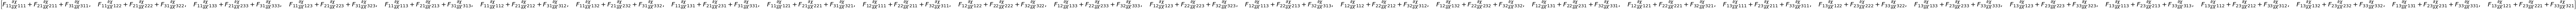

In [24]:
Gamma_voigt

In [25]:
np.random.seed(123)
grad_u = np.array([np.random.rand(3) for _ in range(3)])

print(grad_u)

Ftest_inv = (np.eye(3) - grad_u)
Ftest     = np.linalg.inv(Ftest_inv)
print(Ftest)

[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]]
[[ 0.36729636 -0.77433925 -0.47066315]
 [-1.78661838  0.16546451 -0.64594197]
 [-1.6631696  -1.24478696  0.18500493]]


In [26]:
grad_u.flatten()

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 ])

In [27]:
phi = np.random.rand(9)
grad_phi = np.array([[np.random.rand(3) for _ in range(3)] for __ in range(3)])
print(phi.flatten())

phi_ten = np.array(voigt_to_tensor_2(phi))
print(phi_ten)
chi = phi_ten + np.eye(3)
print(chi.flatten())

[0.39211752 0.34317802 0.72904971 0.43857224 0.0596779  0.39804426
 0.73799541 0.18249173 0.17545176]
[[0.39211752 0.39804426 0.0596779 ]
 [0.17545176 0.34317802 0.43857224]
 [0.18249173 0.73799541 0.72904971]]
[1.39211752 0.39804426 0.0596779  0.17545176 1.34317802 0.43857224
 0.18249173 0.73799541 1.72904971]


In [28]:
grad_phi

array([[[0.53155137, 0.53182759, 0.63440096],
        [0.84943179, 0.72445532, 0.61102351],
        [0.72244338, 0.32295891, 0.36178866]],

       [[0.22826323, 0.29371405, 0.63097612],
        [0.09210494, 0.43370117, 0.43086276],
        [0.4936851 , 0.42583029, 0.31226122]],

       [[0.42635131, 0.89338916, 0.94416002],
        [0.50183668, 0.62395295, 0.1156184 ],
        [0.31728548, 0.41482621, 0.86630916]]])

In [29]:
grad_phi_map = np.zeros([3,3,3])

for i in range(3):
    for I in range(3):
        for J in range(3):
            
            for j in range(3):
                grad_phi_map[i][I][J] += grad_phi[i][I][j] * Ftest[j][J]

temp_mat = np.array([tensor_to_voigt_2(v) for v in grad_phi_map])

In [30]:
temp_mat.flatten()

array([-1.81005245, -1.29847083, -0.48170751, -0.75470999, -0.4763441 ,
       -1.11329654, -0.95632783, -0.9133694 , -1.99856773, -1.49033497,
       -0.53589066, -0.44965118, -0.24378446, -0.18042363, -0.91358478,
       -0.70051865, -1.09881086, -1.45762653, -3.00984646, -0.42927004,
       -0.25701678, -0.61784346, -0.60307115, -1.35759442, -1.25541793,
       -2.06541739, -1.12273603])

In [31]:
temp_mat.shape

In [32]:
np.array([grad_phi[0,0],grad_phi[1,1],grad_phi[2,2],grad_phi[1,2],grad_phi[0,2],grad_phi[0,1],grad_phi[2,1],grad_phi[2,0],grad_phi[1,0]]).flatten()

array([0.53155137, 0.53182759, 0.63440096, 0.09210494, 0.43370117,
       0.43086276, 0.31728548, 0.41482621, 0.86630916, 0.4936851 ,
       0.42583029, 0.31226122, 0.72244338, 0.32295891, 0.36178866,
       0.84943179, 0.72445532, 0.61102351, 0.50183668, 0.62395295,
       0.1156184 , 0.42635131, 0.89338916, 0.94416002, 0.22826323,
       0.29371405, 0.63097612])

In [33]:
#Print code for A_voigt
n = 0
for i in range(A_voigt.shape[0]):
    for j in range(A_voigt.shape[1]):
        if A_voigt[i,j] != zero:
            print(r"        tripletList.push_back(T({0},{1},{2}));".format(i,j,A_voigt[i,j]))
            n += 1
print(n)

        tripletList.push_back(T(0,0,lambda + 2*mu));
        tripletList.push_back(T(0,1,lambda));
        tripletList.push_back(T(0,2,lambda));
        tripletList.push_back(T(1,0,lambda));
        tripletList.push_back(T(1,1,lambda + 2*mu));
        tripletList.push_back(T(1,2,lambda));
        tripletList.push_back(T(2,0,lambda));
        tripletList.push_back(T(2,1,lambda));
        tripletList.push_back(T(2,2,lambda + 2*mu));
        tripletList.push_back(T(3,3,mu));
        tripletList.push_back(T(3,6,mu));
        tripletList.push_back(T(4,4,mu));
        tripletList.push_back(T(4,7,mu));
        tripletList.push_back(T(5,5,mu));
        tripletList.push_back(T(5,8,mu));
        tripletList.push_back(T(6,3,mu));
        tripletList.push_back(T(6,6,mu));
        tripletList.push_back(T(7,4,mu));
        tripletList.push_back(T(7,7,mu));
        tripletList.push_back(T(8,5,mu));
        tripletList.push_back(T(8,8,mu));
21


In [34]:
#Print code for B_voigt
n = 0
for i in range(B_voigt.shape[0]):
    for j in range(B_voigt.shape[1]):
        if B_voigt[i,j] != zero:
            print(r"        tripletList.push_back(T({0},{1},{2}));".format(i,j,B_voigt[i,j]))
            n += 1
print(n)

        tripletList.push_back(T(0,0,eta + kappa + nu - 2*sigma - tau));
        tripletList.push_back(T(0,1,eta - tau));
        tripletList.push_back(T(0,2,eta - tau));
        tripletList.push_back(T(1,0,eta - tau));
        tripletList.push_back(T(1,1,eta + kappa + nu - 2*sigma - tau));
        tripletList.push_back(T(1,2,eta - tau));
        tripletList.push_back(T(2,0,eta - tau));
        tripletList.push_back(T(2,1,eta - tau));
        tripletList.push_back(T(2,2,eta + kappa + nu - 2*sigma - tau));
        tripletList.push_back(T(3,3,kappa - sigma));
        tripletList.push_back(T(3,6,nu - sigma));
        tripletList.push_back(T(4,4,kappa - sigma));
        tripletList.push_back(T(4,7,nu - sigma));
        tripletList.push_back(T(5,5,kappa - sigma));
        tripletList.push_back(T(5,8,nu - sigma));
        tripletList.push_back(T(6,3,nu - sigma));
        tripletList.push_back(T(6,6,kappa - sigma));
        tripletList.push_back(T(7,4,nu - sigma));
        tripletList.push_bac

In [35]:
#Print code for C_voigt
n = 0
for i in range(C_voigt.shape[0]):
    for j in range(C_voigt.shape[1]):
        if C_voigt[i,j] != zero:
            print(r"        tripletList.push_back(T({0},{1},{2}));".format(i,j,C_voigt[i,j]))
            n += 1
print(n)

        tripletList.push_back(T(0,0,2*tau1 + tau10 + tau11 + 2*tau2 + tau3 + tau4 + 2*tau5 + tau6 + tau7 + 2*tau8 + tau9));
        tripletList.push_back(T(0,1,tau1 + tau4 + tau5));
        tripletList.push_back(T(0,2,tau1 + tau4 + tau5));
        tripletList.push_back(T(0,14,tau2 + tau5 + tau6));
        tripletList.push_back(T(0,17,tau1 + tau2 + tau3));
        tripletList.push_back(T(0,22,tau2 + tau5 + tau6));
        tripletList.push_back(T(0,25,tau1 + tau2 + tau3));
        tripletList.push_back(T(1,0,tau1 + tau4 + tau5));
        tripletList.push_back(T(1,1,tau4 + tau7 + tau9));
        tripletList.push_back(T(1,2,tau4));
        tripletList.push_back(T(1,14,tau10 + tau5 + tau8));
        tripletList.push_back(T(1,17,tau1 + tau11 + tau8));
        tripletList.push_back(T(1,22,tau5));
        tripletList.push_back(T(1,25,tau1));
        tripletList.push_back(T(2,0,tau1 + tau4 + tau5));
        tripletList.push_back(T(2,1,tau4));
        tripletList.push_back(T(2,2,tau4 + tau7 + ta

In [36]:
#Print code for D_voigt
n = 0
for i in range(D_voigt.shape[0]):
    for j in range(D_voigt.shape[1]):
        if D_voigt[i,j] != zero:
            print(r"        tripletList.push_back(T({0},{1},{2}));".format(i,j,D_voigt[i,j]))
            n += 1
print(n)

        tripletList.push_back(T(0,0,2*sigma + tau));
        tripletList.push_back(T(0,1,tau));
        tripletList.push_back(T(0,2,tau));
        tripletList.push_back(T(1,0,tau));
        tripletList.push_back(T(1,1,2*sigma + tau));
        tripletList.push_back(T(1,2,tau));
        tripletList.push_back(T(2,0,tau));
        tripletList.push_back(T(2,1,tau));
        tripletList.push_back(T(2,2,2*sigma + tau));
        tripletList.push_back(T(3,3,sigma));
        tripletList.push_back(T(3,6,sigma));
        tripletList.push_back(T(4,4,sigma));
        tripletList.push_back(T(4,7,sigma));
        tripletList.push_back(T(5,5,sigma));
        tripletList.push_back(T(5,8,sigma));
        tripletList.push_back(T(6,3,sigma));
        tripletList.push_back(T(6,6,sigma));
        tripletList.push_back(T(7,4,sigma));
        tripletList.push_back(T(7,7,sigma));
        tripletList.push_back(T(8,5,sigma));
        tripletList.push_back(T(8,8,sigma));
21


In [37]:
temp3

In [38]:
tmp = np.array(range(27)).reshape([3,3,3])

swap = np.zeros([3,3,3]).astype(int)

for i in range(3):
    for j in range(3):
        for k in range(3):
            swap[j,k,i] = tmp[i,j,k]
print(tensor_to_voigt_3(tmp))
print(tensor_to_voigt_3(swap))

[0, 4, 8, 5, 2, 1, 7, 6, 3, 9, 13, 17, 14, 11, 10, 16, 15, 12, 18, 22, 26, 23, 20, 19, 25, 24, 21]
[0, 10, 20, 19, 18, 9, 11, 2, 1, 3, 13, 23, 22, 21, 12, 14, 5, 4, 6, 16, 26, 25, 24, 15, 17, 8, 7]


In [39]:
np.random.seed(1234)
params = np.random.rand(18)

_lambda,_mu,_eta,_tau,_kappa,_nu,_sigma,_tau1,_tau2,_tau3,_tau4,_tau5,_tau6,_tau7,_tau8,_tau9,_tau10,_tau11 = params

In [40]:
A_num = A_voigt.subs({lamb:_lambda,mu:_mu})
print("lambda {0}\nmu {1}".format(_lambda,_mu))
#Print code for A_voigt
n = 0
for i in range(A_voigt.shape[0]):
    for j in range(A_voigt.shape[1]):
        if A_num[i,j] != zero:
            print(r"    tripletList.push_back(T({0},{1},{2}));".format(i,j,A_num[i,j]))
            n += 1
print(n)

lambda 0.191519450379
mu 0.62210877104
    tripletList.push_back(T(0,0,1.43573699245856));
    tripletList.push_back(T(0,1,0.191519450378892));
    tripletList.push_back(T(0,2,0.191519450378892));
    tripletList.push_back(T(1,0,0.191519450378892));
    tripletList.push_back(T(1,1,1.43573699245856));
    tripletList.push_back(T(1,2,0.191519450378892));
    tripletList.push_back(T(2,0,0.191519450378892));
    tripletList.push_back(T(2,1,0.191519450378892));
    tripletList.push_back(T(2,2,1.43573699245856));
    tripletList.push_back(T(3,3,0.622108771039832));
    tripletList.push_back(T(3,6,0.622108771039832));
    tripletList.push_back(T(4,4,0.622108771039832));
    tripletList.push_back(T(4,7,0.622108771039832));
    tripletList.push_back(T(5,5,0.622108771039832));
    tripletList.push_back(T(5,8,0.622108771039832));
    tripletList.push_back(T(6,3,0.622108771039832));
    tripletList.push_back(T(6,6,0.622108771039832));
    tripletList.push_back(T(7,4,0.622108771039832));
    triple

In [41]:
B_num = B_voigt.subs({eta:_eta,tau:_tau,kappa:_kappa,sigma:_sigma,nu:_nu})
for i in range(B_voigt.shape[0]):
    for j in range(B_voigt.shape[1]):
        if B_num[i,j] != zero:
            print(r"    tripletList.push_back(T({0},{1},{2}));".format(i,j,B_num[i,j]))
            n += 1

    tripletList.push_back(T(0,0,0.152009058408597));
    tripletList.push_back(T(0,1,-0.347630844706655));
    tripletList.push_back(T(0,2,-0.347630844706655));
    tripletList.push_back(T(1,0,-0.347630844706655));
    tripletList.push_back(T(1,1,0.152009058408597));
    tripletList.push_back(T(1,2,-0.347630844706655));
    tripletList.push_back(T(2,0,-0.347630844706655));
    tripletList.push_back(T(2,1,-0.347630844706655));
    tripletList.push_back(T(2,2,0.152009058408597));
    tripletList.push_back(T(3,3,0.503511552975707));
    tripletList.push_back(T(3,6,-0.00387164986045507));
    tripletList.push_back(T(4,4,0.503511552975707));
    tripletList.push_back(T(4,7,-0.00387164986045507));
    tripletList.push_back(T(5,5,0.503511552975707));
    tripletList.push_back(T(5,8,-0.00387164986045507));
    tripletList.push_back(T(6,3,-0.00387164986045507));
    tripletList.push_back(T(6,6,0.503511552975707));
    tripletList.push_back(T(7,4,-0.00387164986045507));
    tripletList.push_back

In [42]:
print(_eta, _kappa, _nu, _sigma, _tau)

(0.4377277390071145, 0.7799758081188035, 0.2725926052826416, 0.2764642551430967, 0.7853585837137692)


In [43]:
print(_tau1,_tau2,_tau3,_tau4,_tau5,_tau6,_tau7,_tau8,_tau9,_tau10,_tau11)

(0.8018721775350193, 0.9581393536837052, 0.8759326347420947, 0.35781726995786667, 0.5009951255234587, 0.6834629351721363, 0.7127020269829002, 0.37025075479039493, 0.5611961860656249, 0.5030831653078097, 0.013768449590682241)


In [44]:
C_num = C_voigt.subs({tau1:_tau1,tau2:_tau2,tau3:_tau3,tau4:_tau4,\
                      tau5:_tau5,tau6:_tau6,tau7:_tau7,tau8:_tau8,\
                      tau9:_tau9,tau10:_tau10,tau11:_tau11})
n = 0
for i in range(C_voigt.shape[0]):
    for j in range(C_voigt.shape[1]):
        if C_voigt[i,j] != zero:
            print(r"    tripletList.push_back(T({0},{1},{2}));".format(i,j,C_num[i,j]))
            n += 1

    tripletList.push_back(T(0,0,8.97047749088427));
    tripletList.push_back(T(0,1,1.66068457301634));
    tripletList.push_back(T(0,2,1.66068457301634));
    tripletList.push_back(T(0,14,2.14259741437930));
    tripletList.push_back(T(0,17,2.63594416596082));
    tripletList.push_back(T(0,22,2.14259741437930));
    tripletList.push_back(T(0,25,2.63594416596082));
    tripletList.push_back(T(1,0,1.66068457301634));
    tripletList.push_back(T(1,1,1.63171548300639));
    tripletList.push_back(T(1,2,0.357817269957867));
    tripletList.push_back(T(1,14,1.37432904562166));
    tripletList.push_back(T(1,17,1.18589138191610));
    tripletList.push_back(T(1,22,0.500995125523459));
    tripletList.push_back(T(1,25,0.801872177535019));
    tripletList.push_back(T(2,0,1.66068457301634));
    tripletList.push_back(T(2,1,0.357817269957867));
    tripletList.push_back(T(2,2,1.63171548300639));
    tripletList.push_back(T(2,14,0.500995125523459));
    tripletList.push_back(T(2,17,0.801872177535019

In [45]:
D_num = D_voigt.subs({sigma:_sigma,tau:_tau})
#Print code for D_voigt
n = 0
for i in range(D_voigt.shape[0]):
    for j in range(D_voigt.shape[1]):
        if D_voigt[i,j] != zero:
            print(r"    tripletList.push_back(T({0},{1},{2}));".format(i,j,D_num[i,j]))
            n += 1

    tripletList.push_back(T(0,0,1.33828709399996));
    tripletList.push_back(T(0,1,0.785358583713769));
    tripletList.push_back(T(0,2,0.785358583713769));
    tripletList.push_back(T(1,0,0.785358583713769));
    tripletList.push_back(T(1,1,1.33828709399996));
    tripletList.push_back(T(1,2,0.785358583713769));
    tripletList.push_back(T(2,0,0.785358583713769));
    tripletList.push_back(T(2,1,0.785358583713769));
    tripletList.push_back(T(2,2,1.33828709399996));
    tripletList.push_back(T(3,3,0.276464255143097));
    tripletList.push_back(T(3,6,0.276464255143097));
    tripletList.push_back(T(4,4,0.276464255143097));
    tripletList.push_back(T(4,7,0.276464255143097));
    tripletList.push_back(T(5,5,0.276464255143097));
    tripletList.push_back(T(5,8,0.276464255143097));
    tripletList.push_back(T(6,3,0.276464255143097));
    tripletList.push_back(T(6,6,0.276464255143097));
    tripletList.push_back(T(7,4,0.276464255143097));
    tripletList.push_back(T(7,7,0.276464255143097

In [46]:
print(_sigma,_tau)

(0.2764642551430967, 0.7853585837137692)


In [47]:
for i,v in enumerate(params):
    print("     params[{0}] = {1};".format(i,v))

     params[0] = 0.191519450379;
     params[1] = 0.62210877104;
     params[2] = 0.437727739007;
     params[3] = 0.785358583714;
     params[4] = 0.779975808119;
     params[5] = 0.272592605283;
     params[6] = 0.276464255143;
     params[7] = 0.801872177535;
     params[8] = 0.958139353684;
     params[9] = 0.875932634742;
     params[10] = 0.357817269958;
     params[11] = 0.500995125523;
     params[12] = 0.683462935172;
     params[13] = 0.712702026983;
     params[14] = 0.37025075479;
     params[15] = 0.561196186066;
     params[16] = 0.503083165308;
     params[17] = 0.0137684495907;


In [48]:
RCGinvtest = np.linalg.inv(np.dot(Ftest.T,Ftest))
RCGinvtest

array([[ 0.22546826, -0.15162967, -0.21948678],
       [-0.15162967,  0.56166471,  0.12897273],
       [-0.21948678,  0.12897273,  1.70032187]])

In [49]:
Etest = 0.5*(np.dot(Ftest.T,Ftest) - np.eye(3))
Etest

array([[ 2.54652249,  0.74512895,  0.33674219],
       [ 0.74512895,  0.58823718,  0.01364038],
       [ 0.33674219,  0.01364038, -0.16350417]])

In [50]:
Psitest = np.dot(Ftest.transpose(),chi) - np.eye(3)
Psitest

array([[-1.10566034, -3.48095785, -3.63734467],
       [-1.27610353, -2.00462005, -2.12594132],
       [-0.73478821, -0.91842704, -0.99149769]])

In [51]:
np.dot(Ftest.transpose(),chi)

array([[-0.10566034, -3.48095785, -3.63734467],
       [-1.27610353, -1.00462005, -2.12594132],
       [-0.73478821, -0.91842704,  0.00850231]])

In [52]:
phitest = np.array(tensor_to_voigt_2(chi-np.eye(3))).reshape([3,3])
chitest = phitest + np.eye(3)
phitest

array([[0.39211752, 0.34317802, 0.72904971],
       [0.43857224, 0.0596779 , 0.39804426],
       [0.73799541, 0.18249173, 0.17545176]])

In [53]:
chitest

array([[1.39211752, 0.34317802, 0.72904971],
       [0.43857224, 1.0596779 , 0.39804426],
       [0.73799541, 0.18249173, 1.17545176]])

In [54]:
Psitest = np.dot(Ftest.T,chitest)
Psitest

array([[-1.49965306, -2.07070667, -2.39835151],
       [-1.92405015, -0.31756045, -1.96185662],
       [-0.80197786, -0.81224981, -0.38278596]])

In [55]:
etest = Psitest - np.eye(3)
etest

array([[-2.49965306, -2.07070667, -2.39835151],
       [-1.92405015, -1.31756045, -1.96185662],
       [-0.80197786, -0.81224981, -1.38278596]])

In [56]:
Gammatest = np.zeros([3,3,3])

grad_phi_ref = np.zeros([3,3,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                grad_phi_ref[i,j,k] += grad_phi[i,j,l]*Ftest[l,k]
        
for i in range(3):
    for j in range(3):
        for k in range(3):
            
            for l in range(3):
                Gammatest[i,j,k] += Ftest[l,i]*grad_phi_ref[l,j,k]
Gammatest

array([[[7.00371932, 3.48122737, 1.15039833],
        [3.73745614, 1.19445738, 1.18592603],
        [5.06281784, 2.98827669, 1.05388815]],

       [[4.90161472, 2.40081918, 1.08969334],
        [2.70395114, 1.45113579, 1.31314737],
        [3.0964482 , 2.18733906, 0.61853487]],

       [[1.25775848, 0.86294876, 0.22916968],
        [1.67448265, 0.87787958, 0.39838071],
        [0.75754498, 0.67034417, 0.46962118]]])

In [57]:
np.dot(np.array(A_num),tensor_to_voigt_2(Etest))

array([3.73748117409367, 1.30094823241065, 0.365618464350026,
       0.0169715997966815, 0.418980535143162, 0.927102507351979,
       0.0169715997966815, 0.418980535143162, 0.927102507351979],
      dtype=object)

In [58]:
Atest = np.zeros([3,3,3,3])
Btest = np.zeros([3,3,3,3])
Ctest = np.zeros([3,3,3,3,3,3])
Dtest = np.zeros([3,3,3,3])
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                Atest[i][j][k][l] = A[i][j][k][l].subs({lamb:_lambda,mu:_mu})
                Btest[i][j][k][l] = B[i][j][k][l].subs({eta:_eta, kappa:_kappa, nu:_nu, sigma:_sigma, tau:_tau})
                for m in range(3):
                    for n in range(3):
                        Ctest[i][j][k][l][m][n] = C[i][j][k][l][m][n].subs({tau1:_tau1,tau2:_tau2,tau3:_tau3,tau4:_tau4,\
                      tau5:_tau5,tau6:_tau6,tau7:_tau7,tau8:_tau8,\
                      tau9:_tau9,tau10:_tau10,tau11:_tau11})
                Dtest[i][j][k][l] = D[i][j][k][l].subs({sigma:_sigma,tau:_tau})

In [59]:
term1  = np.zeros([3,3])
term2  = np.zeros([3,3])
term3  = np.zeros([3,3])
term4  = np.zeros([3,3])
term5  = np.zeros([3,3])

temp1  = np.zeros([3,3])
temp2  = np.zeros([3,3])
temp3  = np.zeros([3,3])
temp4  = np.zeros([3,3,3])
temp5  = np.zeros([3,3,3])

T3     = np.zeros([3,3])
T4     = np.zeros([3,3,3])

for i in range(3):
    for j in range(3):
        
        term1[i][j] = 0.
        term2[i][j] = 0.
        temp1[i][j] = 0.
        temp2[i][j] = 0.
        
        for k in range(3):
            for l in range(3):
                term1[i][j] += Atest[i][j][k][l]*Etest[k][l]
                term2[i][j] += Dtest[i][j][k][l]*etest[k][l]
                temp1[i][j] += Btest[i][j][k][l]*etest[k][l]
                temp2[i][j] += Dtest[i][j][k][l]*Etest[k][l]
                
for j in range(3):
    for q in range(3):
        
        temp3[j][q] = zero
        
        for t in range(3):
            temp3[j][q] += RCGinvtest[t][j]*Psitest[t][q]

for j in range(3):
    for q in range(3):
        for r in range(3):
            temp4[j][q][r] = zero
            
            for s in range(3):
                temp4[j][q][r] += RCGinvtest[j][s]*Gammatest[s][q][r]
            
for i in range(3):
    for j in range(3):
        
        term3[i][j] = zero
        term4[i][j] = zero
        
        for q in range(3):
            term3[i][j] += temp1[i][q]*temp3[j][q]
            term4[i][j] += temp2[i][q]*temp3[j][q]
            
for i in range(3):
    for q in range(3):
        for r in range(3):
            temp5[i][q][r] = zero
            
            for l in range(3):
                for m in range(3):
                    for n in range(3):
                        temp5[i][q][r] += Ctest[i][q][r][l][m][n]*Gammatest[l][m][n]
                        
for i in range(3):
    for j in range(3):
        term5[i][j] = zero
        
        for q in range(3):
            for r in range(3):
                term5[i][j] += temp5[i][q][r]*temp4[j][q][r]

In [60]:
tensor_to_voigt_2(term1+term2)

In [61]:
test = np.dot(np.array(A_voigt.subs({lamb:_lambda,mu:_mu})).astype(float),tensor_to_voigt_2(Etest))
test

array([3.73748117, 1.30094823, 0.36561846, 0.0169716 , 0.41898054,
       0.92710251, 0.0169716 , 0.41898054, 0.92710251])

In [62]:
print(Etest)

[[ 2.54652249  0.74512895  0.33674219]
 [ 0.74512895  0.58823718  0.01364038]
 [ 0.33674219  0.01364038 -0.16350417]]


In [63]:
print(etest)

[[-2.49965306 -2.07070667 -2.39835151]
 [-1.92405015 -1.31756045 -1.96185662]
 [-0.80197786 -0.81224981 -1.38278596]]


In [64]:
np.dot(np.array(B_voigt.subs({eta:_eta,kappa:_kappa,nu:_nu,sigma:_sigma,tau:_tau})).astype(float),tensor_to_voigt_2(etest))

array([ 0.55875379,  1.14937443,  1.11678517, -0.98467273, -1.20449272,
       -1.03517548, -0.40138154, -0.39451954, -0.96076443])

In [65]:
np.array(tensor_to_voigt_2(term1)).astype(float) + np.array(tensor_to_voigt_2(term2)).astype(float) + np.array(tensor_to_voigt_2(term3)).astype(float) + np.array(tensor_to_voigt_2(term4)).astype(float) + np.array(tensor_to_voigt_2(term5))

array([ 59.03427247, 160.14321551, 105.82494785, 214.53178439,
       237.37311424, 249.55639324, 110.81529   ,  25.70187797,
        17.88329254])

In [66]:
temp1+temp2

array([[ 4.30029969, -0.62317245, -1.01829836],
       [-0.54876139,  3.80812855, -0.97713057],
       [-0.20832518, -0.39383939,  3.35988006]])

In [67]:
term3+term4

array([[ 0.8695168 , -3.33135597, -4.52829855],
       [-0.83118543,  1.41212675, -2.61185827],
       [-0.46740405, -2.45913293, -0.62002317]])

In [68]:
print(term4)

[[ 0.35634422 -3.71351828 -5.26788636]
 [-0.58708268 -0.3180596  -3.10376646]
 [-0.33491012 -1.94459316 -1.09283432]]


In [69]:
print(term5)

[[ 59.89326816 253.06505417 242.36720893]
 [ 18.89178293 162.24252149 217.89361233]
 [ 26.63507815 114.0243926  110.92779856]]


In [70]:
symm_part = term3 + term4 + term5
symm_part += symm_part.T
print(tensor_to_voigt_2(term1 + term2 + symm_part))

[119.79705742647145, 323.797863741179, 216.1327232353797, 326.0970440545269, 263.54078834196656, 267.61699074207684, 326.0970440545269, 263.54078834196656, 267.61699074207684]


In [125]:
M_num = np.zeros([3,3,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
        
            for l in range(3):
                for m in range(3):
                    for n in range(3):
                        M_num[i,j,k] += Ctest[j][k][i][l][m][n]*Gammatest[l,m,n]
print(tensor_to_voigt_3(M_num))

[81.31981706487282, 31.798586060251203, 27.355416705438902, 4.4605220584734795, 15.239752824275836, 22.9177196136716, 4.761661534444574, 13.617364734132286, 20.63121110748066, 25.44675328806168, 41.98935229144164, 17.274366600902038, 12.970633348345524, 4.295494545624159, 21.18545763236343, 10.684683278867416, 4.658645978608792, 26.55252803655432, 18.652351528895455, 16.02598269360608, 29.787283731069454, 11.179442364112678, 18.362354222680967, 4.559452481399969, 14.13323241247322, 23.039150848588072, 4.849232622884019]


In [126]:
Jac_num = np.linalg.det(Ftest)
cauchy  = np.zeros([3,3])
PK2_num = term1+term2+term3+term4+term5

for i in range(3):
    for j in range(3):
        
        for I in range(3):
            for J in range(3):
                cauchy[i,j] += Ftest[i,I]*PK2_num[I,J]*Ftest[j,J]/Jac_num
print(tensor_to_voigt_2(cauchy))

[-48.84329314813607, -167.47094085138679, -318.99997557253636, -284.3961266524248, -34.71321545072979, -30.136059986911263, -205.35807451733308, -282.42756314420484, -216.4214058205378]


In [127]:
Jac_num = np.linalg.det(Ftest)
s       = np.zeros([3,3])
SIGMA_num = term1+term2+symm_part

for i in range(3):
    for j in range(3):
        
        for I in range(3):
            for J in range(3):
                s[i,j] += Ftest[i,I]*SIGMA_num[I,J]*Ftest[j,J]/Jac_num
print(tensor_to_voigt_2(s))

[-99.10582206835683, -338.1967416137846, -642.1118225175197, -491.7929923630433, -318.2450527392582, -246.8057390623807, -491.7929923630433, -318.24505273925826, -246.80573906238072]


In [129]:
Jac_num = np.linalg.det(Ftest)
m       = np.zeros([3,3,3])

print(Jac_num)

for i in range(3):
    for j in range(3):
        for k in range(3):
            for I in range(3):
                for J in range(3):
                    for K in range(3):
                        m[i,j,k] += Ftest[i,I]*Ftest[j,J]*chitest[k,K]*M_num[I,J,K]/Jac_num
print(tensor_to_voigt_3(m))
#tensor_to_voigt_3(M_num)
tmp = tensor_to_voigt_3(M_num)
np.array([tmp[i*9:(i+1)*9] for i in range(3)])
tensor_to_voigt_3(M_num)

-2.548170917413133
[-17.153265392410482, -12.480771016951493, -19.147225245448556, -11.26628746512982, -14.179072065222964, -15.619789973641112, -27.06888669123007, -21.847082786416394, -9.37069422181913, -7.149691649496841, -97.42799562868105, -125.8651897371535, -139.98361743799694, -12.071479260463587, -18.679837246649882, -118.73866356078591, -197.65579976538393, -200.62313337544705, -20.39625460432565, -109.58264684993866, -145.89097968348062, -132.89656976443473, -21.83692364109874, -32.86501911273255, -165.24571159030918, -239.6065692494737, -201.04091236148963]


Derive a right positive cycle of Gamma

In [73]:
Atot = form_tensor('A',[3,3,3])
Atot_cycle = form_tensor('_A',[3,3,3])
indices       = form_tensor('dummy',[3,3,3])
indices_cycle = form_tensor('dummy',[3,3,3])

n = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            Atot_cycle[j][k][i] = Atot[i][j][k]
            indices[i][j][k]       = (i,j,k)
            indices_cycle[j][k][i] = (i,j,k)
            n += 1
Atot_cycle_voigt = tensor_to_voigt_3(Atot_cycle)
indices_voigt          = tensor_to_voigt_3(indices)
indices_cycle_voigt    = tensor_to_voigt_3(indices_cycle)

print(Atot_cycle_voigt)
indices_cycle_voigt

for i,(iv,icv) in enumerate(zip(indices_voigt,indices_cycle_voigt)):
    j = indices_voigt.index(icv)
    print("        swap[{0}] = A[{1}];".format(i,j))

[A111, A212, A313, A312, A311, A211, A213, A113, A112, A121, A222, A323, A322, A321, A221, A223, A123, A122, A131, A232, A333, A332, A331, A231, A233, A133, A132]
        swap[0] = A[0];
        swap[1] = A[14];
        swap[2] = A[22];
        swap[3] = A[23];
        swap[4] = A[18];
        swap[5] = A[9];
        swap[6] = A[13];
        swap[7] = A[4];
        swap[8] = A[5];
        swap[9] = A[8];
        swap[10] = A[10];
        swap[11] = A[21];
        swap[12] = A[19];
        swap[13] = A[26];
        swap[14] = A[17];
        swap[15] = A[12];
        swap[16] = A[3];
        swap[17] = A[1];
        swap[18] = A[7];
        swap[19] = A[15];
        swap[20] = A[20];
        swap[21] = A[24];
        swap[22] = A[25];
        swap[23] = A[16];
        swap[24] = A[11];
        swap[25] = A[2];
        swap[26] = A[6];


In [74]:
Atot = form_tensor('A',[3,3,3])
Atot_cycle = form_tensor('_A',[3,3,3])
indices       = form_tensor('dummy',[3,3,3])
indices_cycle = form_tensor('dummy',[3,3,3])

n = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            Atot_cycle[j][k][i] = Atot[i][j][k]
            indices[i][j][k]       = (i,j,k)
            indices_cycle[j][k][i] = (i,j,k)
            n += 1
Atot_cycle_voigt = tensor_to_voigt_3(Atot_cycle)
indices_voigt          = tensor_to_voigt_3(indices)
indices_cycle_voigt    = tensor_to_voigt_3(indices_cycle)

print(Atot_cycle_voigt)
indices_cycle_voigt

for i,(iv,icv) in enumerate(zip(indices_voigt,indices_cycle_voigt)):
    j = indices_voigt.index(icv)
    print("        swap[{0}] = A[{1}];".format(i,j))

[A111, A212, A313, A312, A311, A211, A213, A113, A112, A121, A222, A323, A322, A321, A221, A223, A123, A122, A131, A232, A333, A332, A331, A231, A233, A133, A132]
        swap[0] = A[0];
        swap[1] = A[14];
        swap[2] = A[22];
        swap[3] = A[23];
        swap[4] = A[18];
        swap[5] = A[9];
        swap[6] = A[13];
        swap[7] = A[4];
        swap[8] = A[5];
        swap[9] = A[8];
        swap[10] = A[10];
        swap[11] = A[21];
        swap[12] = A[19];
        swap[13] = A[26];
        swap[14] = A[17];
        swap[15] = A[12];
        swap[16] = A[3];
        swap[17] = A[1];
        swap[18] = A[7];
        swap[19] = A[15];
        swap[20] = A[20];
        swap[21] = A[24];
        swap[22] = A[25];
        swap[23] = A[16];
        swap[24] = A[11];
        swap[25] = A[2];
        swap[26] = A[6];


Perform a left positive cycle of Gamma

In [75]:
Atot = form_tensor('A',[3,3,3])
Atot_cycle = form_tensor('_A',[3,3,3])
indices       = form_tensor('dummy',[3,3,3])
indices_cycle = form_tensor('dummy',[3,3,3])

n = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            Atot_cycle[k][i][j] = Atot[i][j][k]
            indices[i][j][k]       = (i,j,k)
            indices_cycle[k][i][j] = (i,j,k)
            n += 1
Atot_cycle_voigt = tensor_to_voigt_3(Atot_cycle)
indices_voigt          = tensor_to_voigt_3(indices)
indices_cycle_voigt    = tensor_to_voigt_3(indices_cycle)

print(Atot_cycle_voigt)
indices_cycle_voigt

for i,(iv,icv) in enumerate(zip(indices_voigt,indices_cycle_voigt)):
    j = indices_voigt.index(icv)
    print("        swap[{0}] = A[{1}];".format(i,j))

[A111, A221, A331, A231, A131, A121, A321, A311, A211, A112, A222, A332, A232, A132, A122, A322, A312, A212, A113, A223, A333, A233, A133, A123, A323, A313, A213]
        swap[0] = A[0];
        swap[1] = A[17];
        swap[2] = A[25];
        swap[3] = A[16];
        swap[4] = A[7];
        swap[5] = A[8];
        swap[6] = A[26];
        swap[7] = A[18];
        swap[8] = A[9];
        swap[9] = A[5];
        swap[10] = A[10];
        swap[11] = A[24];
        swap[12] = A[15];
        swap[13] = A[6];
        swap[14] = A[1];
        swap[15] = A[19];
        swap[16] = A[23];
        swap[17] = A[14];
        swap[18] = A[4];
        swap[19] = A[12];
        swap[20] = A[20];
        swap[21] = A[11];
        swap[22] = A[2];
        swap[23] = A[3];
        swap[24] = A[21];
        swap[25] = A[22];
        swap[26] = A[13];


In [76]:
Atot    = form_tensor('dummy',[3,3,3])
_Atot   = form_tensor('dummy',[3,3,3])

n = 0;
for i in range(3):
    for j in range(3):
        for k in range(3):
            _Atot[i][j][k] = n
            Atot[k][i][j]  = n
            n+=1
print(tensor_to_voigt_3(Atot))
print(tensor_to_voigt_3(_Atot))

[0, 12, 24, 15, 6, 3, 21, 18, 9, 1, 13, 25, 16, 7, 4, 22, 19, 10, 2, 14, 26, 17, 8, 5, 23, 20, 11]
[0, 4, 8, 5, 2, 1, 7, 6, 3, 9, 13, 17, 14, 11, 10, 16, 15, 12, 18, 22, 26, 23, 20, 19, 25, 24, 21]


In [95]:
cauchy = form_tensor('cauchy',[3,3])
PK2    = form_tensor('PK2',[3,3])

for i in range(3):
    for j in range(3):
        cauchy[i][j] = zero
        
        for I in range(3):
            for J in range(3):
                cauchy[i][j] += F[i][I]*PK2[I][J]*F[j][J]/Jac
cauchy_voigt = tensor_to_voigt_2(cauchy)

print "        //Extract the values of the deformation gradient"
for i in range(3):
    for I in range(3):
        print("        double F{0}{1} = F({2},{3});".format(i+1,I+1,i,I))

print "\n        //Extract the values of the PK2 Stress"
for i in range(3):
    for I in range(3):
        print("        double PK2{0}{1} = PK2({0},{1})".format(i+1,I+1,i,I))
        
print "\n        //Compute the cauchy stress"
for i in range(9):
    print "        cauchy[{0}] = {1}".format(i,cauchy_voigt[i])

        //Extract the values of the deformation gradient
        double F11 = F(0,0);
        double F12 = F(0,1);
        double F13 = F(0,2);
        double F21 = F(1,0);
        double F22 = F(1,1);
        double F23 = F(1,2);
        double F31 = F(2,0);
        double F32 = F(2,1);
        double F33 = F(2,2);

        //Extract the values of the PK2 Stress
        double PK211 = PK2(1,1)
        double PK212 = PK2(1,2)
        double PK213 = PK2(1,3)
        double PK221 = PK2(2,1)
        double PK222 = PK2(2,2)
        double PK223 = PK2(2,3)
        double PK231 = PK2(3,1)
        double PK232 = PK2(3,2)
        double PK233 = PK2(3,3)

        //Compute the cauchy stress
        cauchy[0] = F11**2*PK211/J + F11*F12*PK212/J + F11*F12*PK221/J + F11*F13*PK213/J + F11*F13*PK231/J + F12**2*PK222/J + F12*F13*PK223/J + F12*F13*PK232/J + F13**2*PK233/J
        cauchy[1] = F21**2*PK211/J + F21*F22*PK212/J + F21*F22*PK221/J + F21*F23*PK213/J + F21*F23*PK231/J + F22**2*PK222/J + F22*F2

In [101]:
Atot = form_tensor('Atot',[3,3,3])
Bsot = form_tensor('Bsot',[3,3])
temp = form_tensor('temp',[3,3,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            temp[i][j][k] = zero
            
            
            for I in range(3):
                temp[i][j][k] += F[i][I]*Atot[I][j][k]

temp_voigt = tensor_to_voigt_3(temp)
for i in range(len(temp_voigt)):
    print("        m[{0}] = {1};".format(i,temp_voigt[i]))

        m[0] = F11*M111 + F12*M211 + F13*M311;
        m[1] = F11*M122 + F12*M222 + F13*M322;
        m[2] = F11*M133 + F12*M233 + F13*M333;
        m[3] = F11*M123 + F12*M223 + F13*M323;
        m[4] = F11*M113 + F12*M213 + F13*M313;
        m[5] = F11*M112 + F12*M212 + F13*M312;
        m[6] = F11*M132 + F12*M232 + F13*M332;
        m[7] = F11*M131 + F12*M231 + F13*M331;
        m[8] = F11*M121 + F12*M221 + F13*M321;
        m[9] = F21*M111 + F22*M211 + F23*M311;
        m[10] = F21*M122 + F22*M222 + F23*M322;
        m[11] = F21*M133 + F22*M233 + F23*M333;
        m[12] = F21*M123 + F22*M223 + F23*M323;
        m[13] = F21*M113 + F22*M213 + F23*M313;
        m[14] = F21*M112 + F22*M212 + F23*M312;
        m[15] = F21*M132 + F22*M232 + F23*M332;
        m[16] = F21*M131 + F22*M231 + F23*M331;
        m[17] = F21*M121 + F22*M221 + F23*M321;
        m[18] = F31*M111 + F32*M211 + F33*M311;
        m[19] = F31*M122 + F32*M222 + F33*M322;
        m[20] = F31*M133 + F32*M233 + F33*M333;
  

In [160]:
T1  = form_tensor('T1',[3,3])
eye = sympy.Matrix([[one,zero,zero],[zero,one,zero],[zero,zero,one]])

term2 = form_tensor('term2',[3,3,3,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            for K in range(3):
                term2[i][j][k][K] = eye[i,k]*T1[K][j]
term2

In [199]:
indices = [(0,0),(1,1),(2,2),(1,2),(0,2),(0,1),(2,1),(2,0),(1,0)]
def map_fot_to_voigt(A):
    Amat = [[None for __ in range(9)] for _ in range(9)]
    
    for m,Ihat in enumerate(indices):
        for n,Jhat in enumerate(indices):
            i,j = Ihat
            k,l = Jhat
            Amat[m][n] = A[i][j][k][l]
    return Amat
term2_voigt = map_fot_to_voigt(term2)

for m in range(9):
    for n in range(9):
        if(term2_voigt[m][n] != zero):
            print("        term2({0},{1}) = {2}".format(m,n,term2_voigt[m][n]))

        term2(0,0) = T111
        term2(0,4) = T131
        term2(0,5) = T121
        term2(1,1) = T122
        term2(1,3) = T132
        term2(1,8) = T112
        term2(2,2) = T133
        term2(2,6) = T123
        term2(2,7) = T113
        term2(3,1) = T123
        term2(3,3) = T133
        term2(3,8) = T113
        term2(4,0) = T113
        term2(4,4) = T133
        term2(4,5) = T123
        term2(5,0) = T112
        term2(5,4) = T132
        term2(5,5) = T122
        term2(6,2) = T132
        term2(6,6) = T122
        term2(6,7) = T112
        term2(7,2) = T131
        term2(7,6) = T121
        term2(7,7) = T111
        term2(8,1) = T121
        term2(8,3) = T131
        term2(8,8) = T111


In [200]:
dcauchydF = form_tensor('dcauchydF',[3,3,3,3])
dSdF = form_tensor('dSdF',[3,3,3,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            for K in range(3):
                
                dcauchydF[i][j][k][K] = zero
                
                for I in range(3):
                    for J in range(3):
                        dcauchydF[i][j][k][K] += F[i][I]*dSdF[I][J][k][K]*F[j][J]

In [201]:
dcauchydF_voigt = map_fot_to_voigt(dcauchydF)

In [203]:
print("        //Extract the deformation gradient")
for i in range(3):
    for j in range(3):
        print("        double F{0}{1} = F({2},{3});".format(i+1,j+1,i,j))
print("")
print("        //Extract the jacobian of the PK2 stress")
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                I1 = indices.index((i,j))
                I2 = indices.index((k,l))
                print("        double dSdF{0}{1}{2}{3} = dSdF({4},{5});".format(i+1,j+1,k+1,l+1,I1,I2))
print("")
print("        //Compute term3")
for m in range(9):
    for n in range(9):
        if(dcauchydF_voigt[m][n] != zero):
            print("        term({0},{1}) = {2};".format(m,n,dcauchydF_voigt[m][n]))

        //Extract the deformation gradient
        double F11 = F(0,0);
        double F12 = F(0,1);
        double F13 = F(0,2);
        double F21 = F(1,0);
        double F22 = F(1,1);
        double F23 = F(1,2);
        double F31 = F(2,0);
        double F32 = F(2,1);
        double F33 = F(2,2);

        //Extract the jacobian of the PK2 stress
        double dSdF1111 = dSdF(0,0);
        double dSdF1112 = dSdF(0,5);
        double dSdF1113 = dSdF(0,4);
        double dSdF1121 = dSdF(0,8);
        double dSdF1122 = dSdF(0,1);
        double dSdF1123 = dSdF(0,3);
        double dSdF1131 = dSdF(0,7);
        double dSdF1132 = dSdF(0,6);
        double dSdF1133 = dSdF(0,2);
        double dSdF1211 = dSdF(5,0);
        double dSdF1212 = dSdF(5,5);
        double dSdF1213 = dSdF(5,4);
        double dSdF1221 = dSdF(5,8);
        double dSdF1222 = dSdF(5,1);
        double dSdF1223 = dSdF(5,3);
        double dSdF1231 = dSdF(5,7);
        double dSdF1232 = dSdF(5,6);
        double dS

        term(7,4) = F11*F31*dSdF1113 + F11*F32*dSdF2113 + F11*F33*dSdF3113 + F12*F31*dSdF1213 + F12*F32*dSdF2213 + F12*F33*dSdF3213 + F13*F31*dSdF1313 + F13*F32*dSdF2313 + F13*F33*dSdF3313;
        term(7,5) = F11*F31*dSdF1112 + F11*F32*dSdF2112 + F11*F33*dSdF3112 + F12*F31*dSdF1212 + F12*F32*dSdF2212 + F12*F33*dSdF3212 + F13*F31*dSdF1312 + F13*F32*dSdF2312 + F13*F33*dSdF3312;
        term(7,6) = F11*F31*dSdF1132 + F11*F32*dSdF2132 + F11*F33*dSdF3132 + F12*F31*dSdF1232 + F12*F32*dSdF2232 + F12*F33*dSdF3232 + F13*F31*dSdF1332 + F13*F32*dSdF2332 + F13*F33*dSdF3332;
        term(7,7) = F11*F31*dSdF1131 + F11*F32*dSdF2131 + F11*F33*dSdF3131 + F12*F31*dSdF1231 + F12*F32*dSdF2231 + F12*F33*dSdF3231 + F13*F31*dSdF1331 + F13*F32*dSdF2331 + F13*F33*dSdF3331;
        term(7,8) = F11*F31*dSdF1121 + F11*F32*dSdF2121 + F11*F33*dSdF3121 + F12*F31*dSdF1221 + F12*F32*dSdF2221 + F12*F33*dSdF3221 + F13*F31*dSdF1321 + F13*F32*dSdF2321 + F13*F33*dSdF3321;
        term(8,0) = F11*F21*dSdF1111 + F11*F22*dSd

In [204]:
T1  = form_tensor('T1',[3,3])
eye = sympy.Matrix([[one,zero,zero],[zero,one,zero],[zero,zero,one]])

term3 = form_tensor('term3',[3,3,3,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            for K in range(3):
                term3[i][j][k][K] = T1[i][K]*eye[j,k]
term3

In [205]:
def map_fot_to_voigt(A):
    Amat = [[None for __ in range(9)] for _ in range(9)]
    indices = [(0,0),(1,1),(2,2),(1,2),(0,2),(0,1),(2,1),(2,0),(1,0)]
    
    for m,Ihat in enumerate(indices):
        for n,Jhat in enumerate(indices):
            i,j = Ihat
            k,l = Jhat
            Amat[m][n] = A[i][j][k][l]
    return Amat
term3_voigt = map_fot_to_voigt(term3)

for m in range(9):
    for n in range(9):
        if(term3_voigt[m][n] != zero):
            print("        term3({0},{1}) = {2};".format(m,n,term3_voigt[m][n]))

        term3(0,0) = T111;
        term3(0,4) = T113;
        term3(0,5) = T112;
        term3(1,1) = T122;
        term3(1,3) = T123;
        term3(1,8) = T121;
        term3(2,2) = T133;
        term3(2,6) = T132;
        term3(2,7) = T131;
        term3(3,2) = T123;
        term3(3,6) = T122;
        term3(3,7) = T121;
        term3(4,2) = T113;
        term3(4,6) = T112;
        term3(4,7) = T111;
        term3(5,1) = T112;
        term3(5,3) = T113;
        term3(5,8) = T111;
        term3(6,1) = T132;
        term3(6,3) = T133;
        term3(6,8) = T131;
        term3(7,0) = T131;
        term3(7,4) = T133;
        term3(7,5) = T132;
        term3(8,0) = T121;
        term3(8,4) = T123;
        term3(8,5) = T122;


In [206]:
dcauchydgrad_chi = form_tensor('dcauchydgrad_chi',[3,3,3,3,3])
dSdgrad_chi = form_tensor('dSdtot',[3,3,3,3,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            for K in range(3):
                for L in range(3):
                
                    dcauchydgrad_chi[i][j][k][K][L] = zero
                
                    for I in range(3):
                        for J in range(3):
                            dcauchydgrad_chi[i][j][k][K][L] += F[i][I]*dSdgrad_chi[I][J][k][K][L]*F[j][J]

In [207]:
tmp = [[[None for ___ in range(3)] for __ in range(3)] for _ in range(3)]

for i in range(3):
    for j in range(3):
        for k in range(3):
            tmp[i][j][k] = (i,j,k)
indices_tot = tensor_to_voigt_3(tmp)

In [208]:
def map_fifthot_to_voigt(A):
    Amat = [[None for __ in range(27)] for _ in range(9)]
    indices = [(0,0),(1,1),(2,2),(1,2),(0,2),(0,1),(2,1),(2,0),(1,0)]
    
    for mi,Ihat in enumerate(indices):
        for ni,Jhat in enumerate(indices_tot):
            i,j = Ihat
            k,l,m = Jhat
            Amat[mi][ni] = A[i][j][k][l][m]
    return Amat

In [211]:
dcdgrad_chi_voigt = map_fifthot_to_voigt(dcauchydgrad_chi)

print("        //Extract the deformation gradient")
for i in range(3):
    for j in range(3):
        print("        double {0} = F({1},{2});".format(F[i][j],i,j))
        
print("")
print("        //Extract the gradient of the stress in the reference configuration")
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                for m in range(3):
                    I1 = indices.index((i,j))
                    I2 = indices_tot.index((k,l,m))
                    print("        double {0} = dSdtot({1},{2});".format(dSdgrad_chi[i][j][k][l][m],I1,I2))

print("")
print("        //Map the stress gradient w.r.t. the gradient of chi")
for i in range(9):
    for j in range(27):
        print("        term({0},{1}) = {2};".format(i,j,dcdgrad_chi_voigt[i][j]))

        //Extract the deformation gradient
        double F11 = F(0,0);
        double F12 = F(0,1);
        double F13 = F(0,2);
        double F21 = F(1,0);
        double F22 = F(1,1);
        double F23 = F(1,2);
        double F31 = F(2,0);
        double F32 = F(2,1);
        double F33 = F(2,2);

        //Extract the gradient of the stress in the reference configuration
        double dSdtot11111 = dSdtot(0,0);
        double dSdtot11112 = dSdtot(0,5);
        double dSdtot11113 = dSdtot(0,4);
        double dSdtot11121 = dSdtot(0,8);
        double dSdtot11122 = dSdtot(0,1);
        double dSdtot11123 = dSdtot(0,3);
        double dSdtot11131 = dSdtot(0,7);
        double dSdtot11132 = dSdtot(0,6);
        double dSdtot11133 = dSdtot(0,2);
        double dSdtot11211 = dSdtot(0,9);
        double dSdtot11212 = dSdtot(0,14);
        double dSdtot11213 = dSdtot(0,13);
        double dSdtot11221 = dSdtot(0,17);
        double dSdtot11222 = dSdtot(0,10);
        double dSdtot11223 

        term(2,20) = F31**2*dSdtot11333 + F31*F32*dSdtot12333 + F31*F32*dSdtot21333 + F31*F33*dSdtot13333 + F31*F33*dSdtot31333 + F32**2*dSdtot22333 + F32*F33*dSdtot23333 + F32*F33*dSdtot32333 + F33**2*dSdtot33333;
        term(2,21) = F31**2*dSdtot11323 + F31*F32*dSdtot12323 + F31*F32*dSdtot21323 + F31*F33*dSdtot13323 + F31*F33*dSdtot31323 + F32**2*dSdtot22323 + F32*F33*dSdtot23323 + F32*F33*dSdtot32323 + F33**2*dSdtot33323;
        term(2,22) = F31**2*dSdtot11313 + F31*F32*dSdtot12313 + F31*F32*dSdtot21313 + F31*F33*dSdtot13313 + F31*F33*dSdtot31313 + F32**2*dSdtot22313 + F32*F33*dSdtot23313 + F32*F33*dSdtot32313 + F33**2*dSdtot33313;
        term(2,23) = F31**2*dSdtot11312 + F31*F32*dSdtot12312 + F31*F32*dSdtot21312 + F31*F33*dSdtot13312 + F31*F33*dSdtot31312 + F32**2*dSdtot22312 + F32*F33*dSdtot23312 + F32*F33*dSdtot32312 + F33**2*dSdtot33312;
        term(2,24) = F31**2*dSdtot11332 + F31*F32*dSdtot12332 + F31*F32*dSdtot21332 + F31*F33*dSdtot13332 + F31*F33*dSdtot31332 + F32**2*dSd

        term(6,6) = F21*F31*dSdtot11132 + F21*F32*dSdtot21132 + F21*F33*dSdtot31132 + F22*F31*dSdtot12132 + F22*F32*dSdtot22132 + F22*F33*dSdtot32132 + F23*F31*dSdtot13132 + F23*F32*dSdtot23132 + F23*F33*dSdtot33132;
        term(6,7) = F21*F31*dSdtot11131 + F21*F32*dSdtot21131 + F21*F33*dSdtot31131 + F22*F31*dSdtot12131 + F22*F32*dSdtot22131 + F22*F33*dSdtot32131 + F23*F31*dSdtot13131 + F23*F32*dSdtot23131 + F23*F33*dSdtot33131;
        term(6,8) = F21*F31*dSdtot11121 + F21*F32*dSdtot21121 + F21*F33*dSdtot31121 + F22*F31*dSdtot12121 + F22*F32*dSdtot22121 + F22*F33*dSdtot32121 + F23*F31*dSdtot13121 + F23*F32*dSdtot23121 + F23*F33*dSdtot33121;
        term(6,9) = F21*F31*dSdtot11211 + F21*F32*dSdtot21211 + F21*F33*dSdtot31211 + F22*F31*dSdtot12211 + F22*F32*dSdtot22211 + F22*F33*dSdtot32211 + F23*F31*dSdtot13211 + F23*F32*dSdtot23211 + F23*F33*dSdtot33211;
        term(6,10) = F21*F31*dSdtot11222 + F21*F32*dSdtot21222 + F21*F33*dSdtot31222 + F22*F31*dSdtot12222 + F22*F32*dSdtot22222 + F